[-0.01936657  0.03738158  0.00576915 -0.00975155] (4,)
[[-0.01936657  0.03738158  0.00576915 -0.00975155]] (1, 4)
AxesSubplot(0.125,0.11;0.775x0.77)


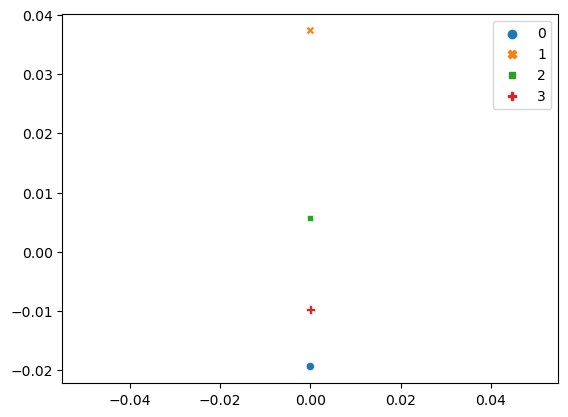

In [62]:
import gym
import numpy as np
from agent import Agent
from utils import plotLearning
import seaborn

if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    N = 20
    batch_size = 5
    n_epochs = 4
    alpha = 0.003
    action_space = env.action_space
    state_space = env.observation_space
    
    agent = Agent(n_actions=env.action_space.n, batch_size=batch_size,
                  alpha=alpha, n_epochs=n_epochs,
                  input_dims=env.observation_space.shape)
    n_games = 1
    filename = 'plots/catpole.png'
    # minimum score for the environment
    best_score = env.reward_range[0]
    score_history = []
    
    learn_iters = 0
    avg_score = 0
    n_steps = 0

    for i in range(n_games):
        observation = env.reset()
        print(observation, observation.shape)
        flip_obs = np.reshape(observation, (-1,4))
        print(flip_obs, flip_obs.shape)
        done = False
        score = 0
        p1 = seaborn.scatterplot(data=flip_obs)
        # p2 = seaborn.scatterplot(data=observation)
        print(p1)
        while not done:
            action, prob, val = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            n_steps += 1
            score += reward
            agent.remember(observation, action, prob, val, reward, done)
            if n_steps % N == 0:
                agent.learn()
                learn_iters += 1
            observation = observation_
          
        score_history.append(score)
        avg_score = np.mean(score_history[-100:])

    #     if avg_score > best_score:
    #         best_score= avg_score
    #         agent.save_models()
    #     print('episode', i, 'score%.1f' % score, 'avg score %.1f' % avg_score,
    #           'time steps', n_steps, 'learning_steps', learn_iters)
    # x = [i+1 for i in range(len(score_history))]
    # plotLearning(x, score_history, filename=filename, epsilons=0.4)

